In [29]:
# imports

import urllib, json
import pandas as pd

In [30]:
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')


In [31]:
df.head()

,rating,year,imdbid,title,id
0,0,1874,3155794,Passage de Venus,9602
1,0,1877,14495706,La Rosace Magique,9804
2,0,1878,2221420,Sallie Gardner at a Gallop,9603
3,0,1878,12592084,Le singe musicien,9806
4,0,1881,7816420,Athlete Swinging a Pick,9816


In [32]:
# filter movies after 1967
dfNew = df[df['year']>=1967]

In [33]:
dfNew.rename(columns={'rating':'Bechdel Score'}, inplace=True)

In [34]:
dfNew['year'] = pd.to_datetime(dfNew['year'], format='%Y')
dfNew['Bechdel Score'] = dfNew['Bechdel Score'].astype('category',copy=False)


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<Axes: xlabel='Bechdel Score', ylabel='count'>

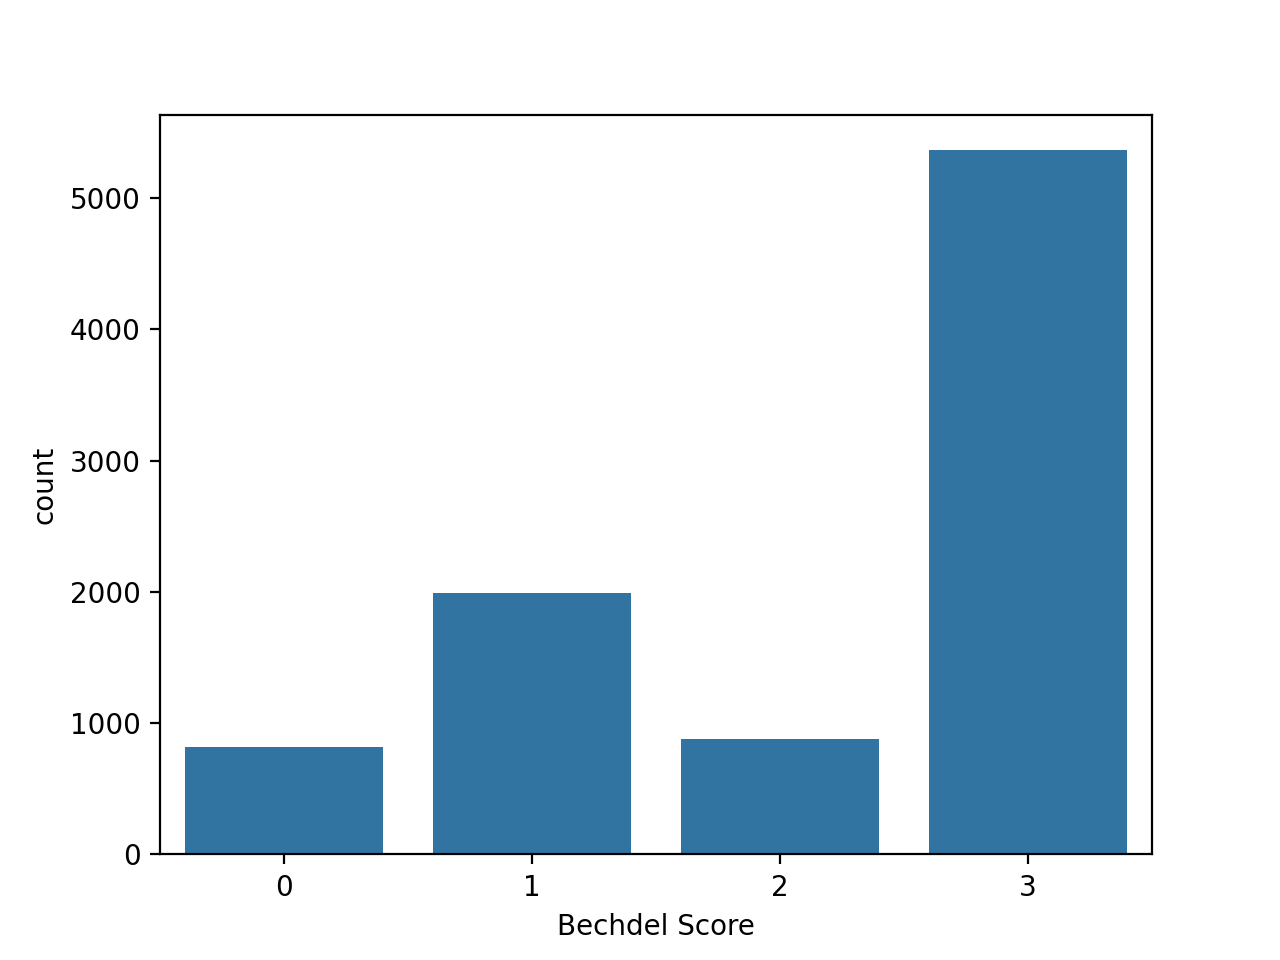

In [36]:
sns.countplot(x='Bechdel Score',data=dfNew)

In [38]:
li = []
for i in dfNew['Bechdel Score']:
    if(i<3):
        li.append(0)
    else:
        li.append(1)
dfNew['pass_test'] = li

<Axes: xlabel='pass_test', ylabel='count'>

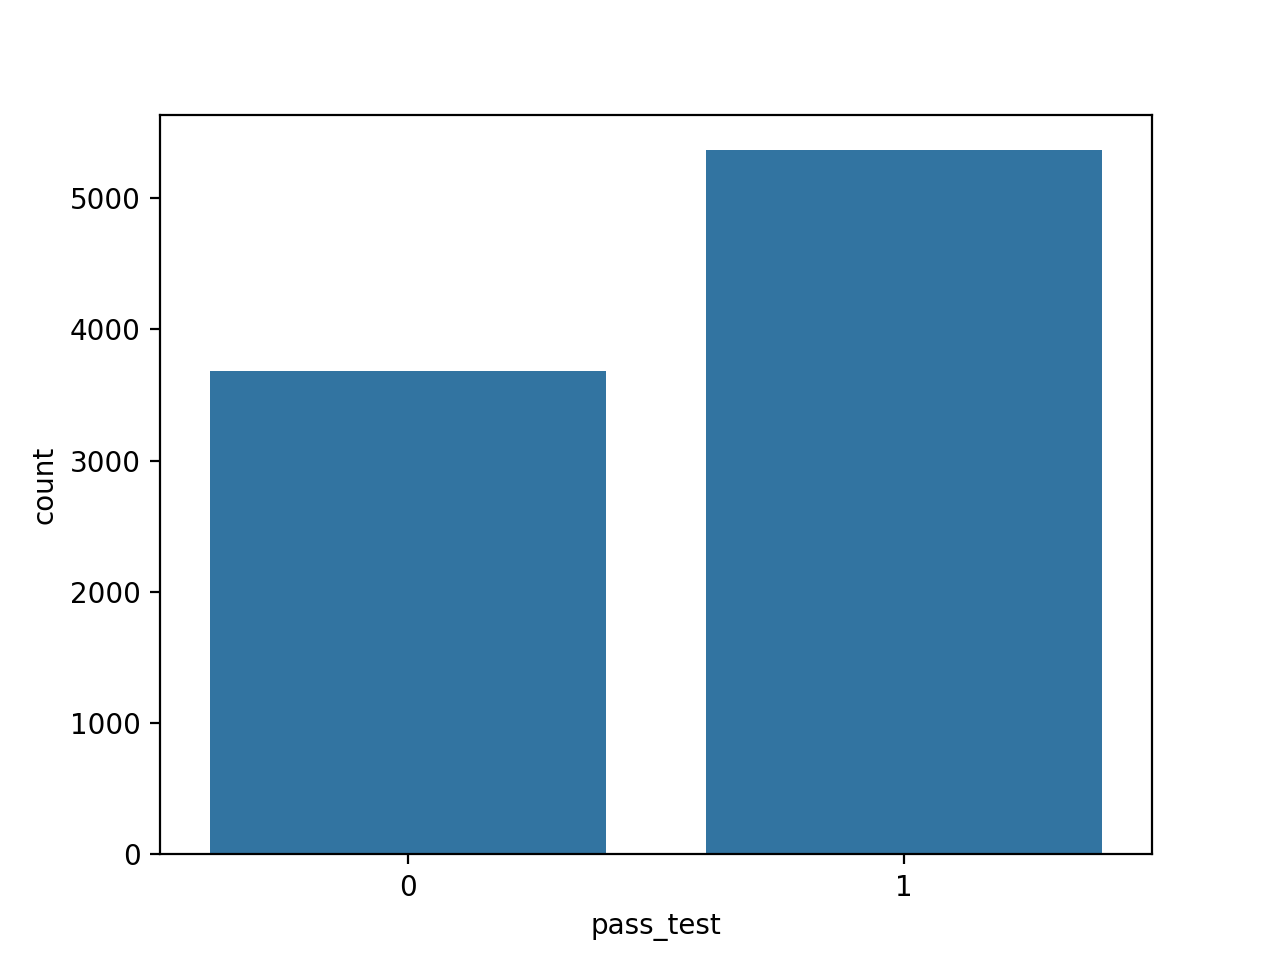

In [39]:
sns.countplot(x='pass_test',data=dfNew)

In [40]:
# imports
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
py.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [41]:
df_by_date = dfNew.loc[dfNew['year'].sort_values().index]
by_date = df_by_date.groupby('year').year.count()
by_date.iplot(kind='scatter', title='Number of movies with year',name='rating')


In [42]:
from plotnine import *

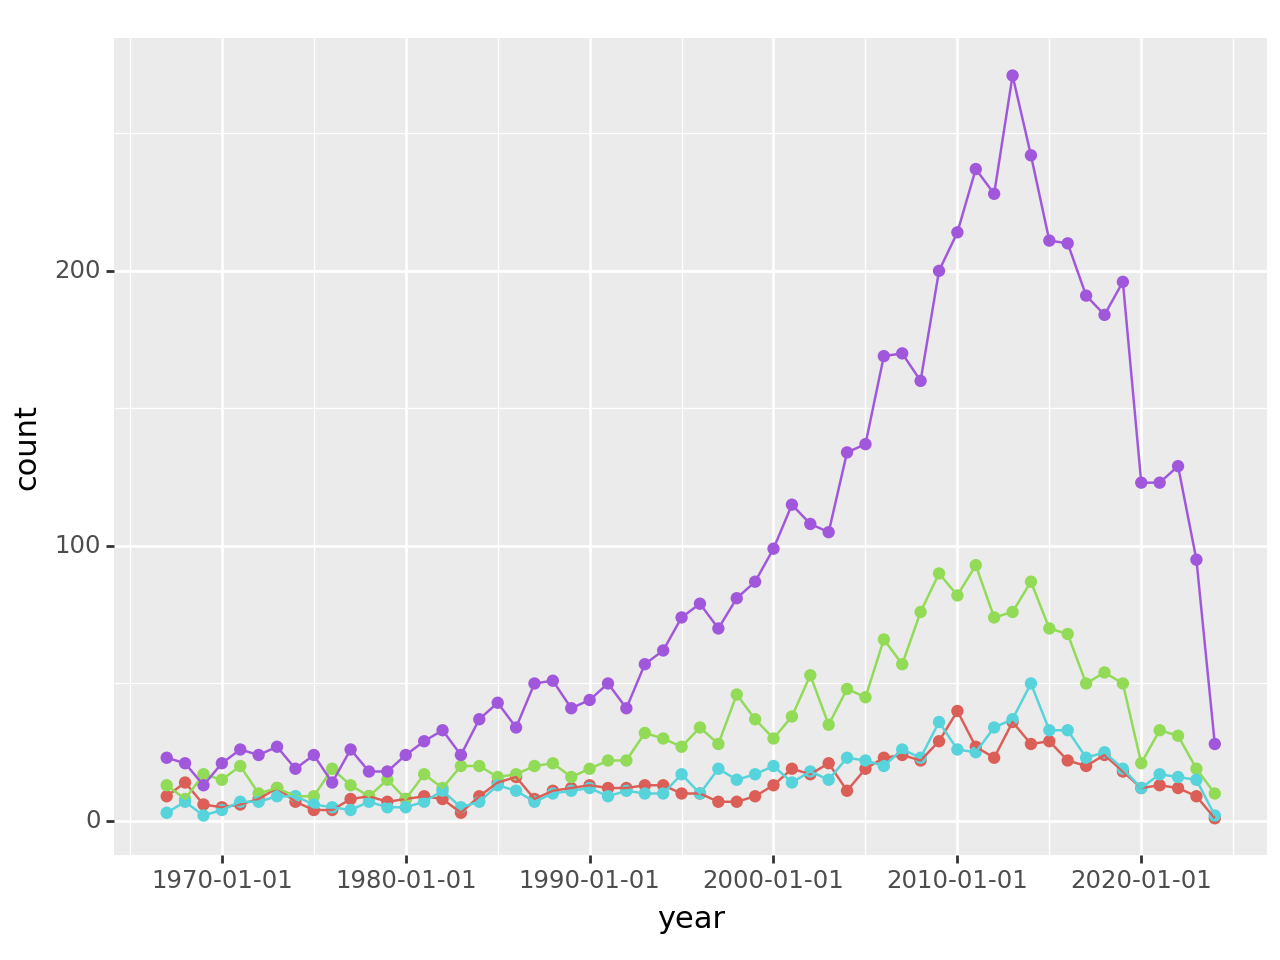

<Figure Size: (640 x 480)>

In [43]:
(ggplot(dfNew)+geom_point(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False)+geom_line(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False))


In [44]:
imdb = pd.read_csv('movies.csv')
imdbNew = imdb[['title','rating']]
dfNew = pd.merge(dfNew, imdbNew, how='left', left_on=['title'], right_on=['title'])
dfNew.head()


,Bechdel Score,year,imdbid,title,id,pass_test,rating
0,1,1967-01-01,0061512,Cool Hand Luke,301,0,8.2
1,1,1967-01-01,0061852,"Jungle Book, The",493,0,7.5
2,1,1967-01-01,0061852,"Jungle Book, The",493,0,5.9
3,2,1967-01-01,0061722,"Graduate, The",616,0,8.2
4,1,1967-01-01,0063278,Marketa Lazarova,2054,0,NaN


In [45]:
# Dropping rows with null values:
dfNew = dfNew.dropna()
dfNew = dfNew.drop('id',axis=1)
# Creating a new dataframe with only year, Bechdel scores, and imdb rating:
new = dfNew.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()
new.head()

<ipython-input-45-ee0cb753d2e9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,year,Bechdel Score,rating
0,1967-01-01,0,7.050000
1,1967-01-01,1,6.844444
2,1967-01-01,2,6.000000
3,1967-01-01,3,6.514286
4,1968-01-01,0,7.262500


/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


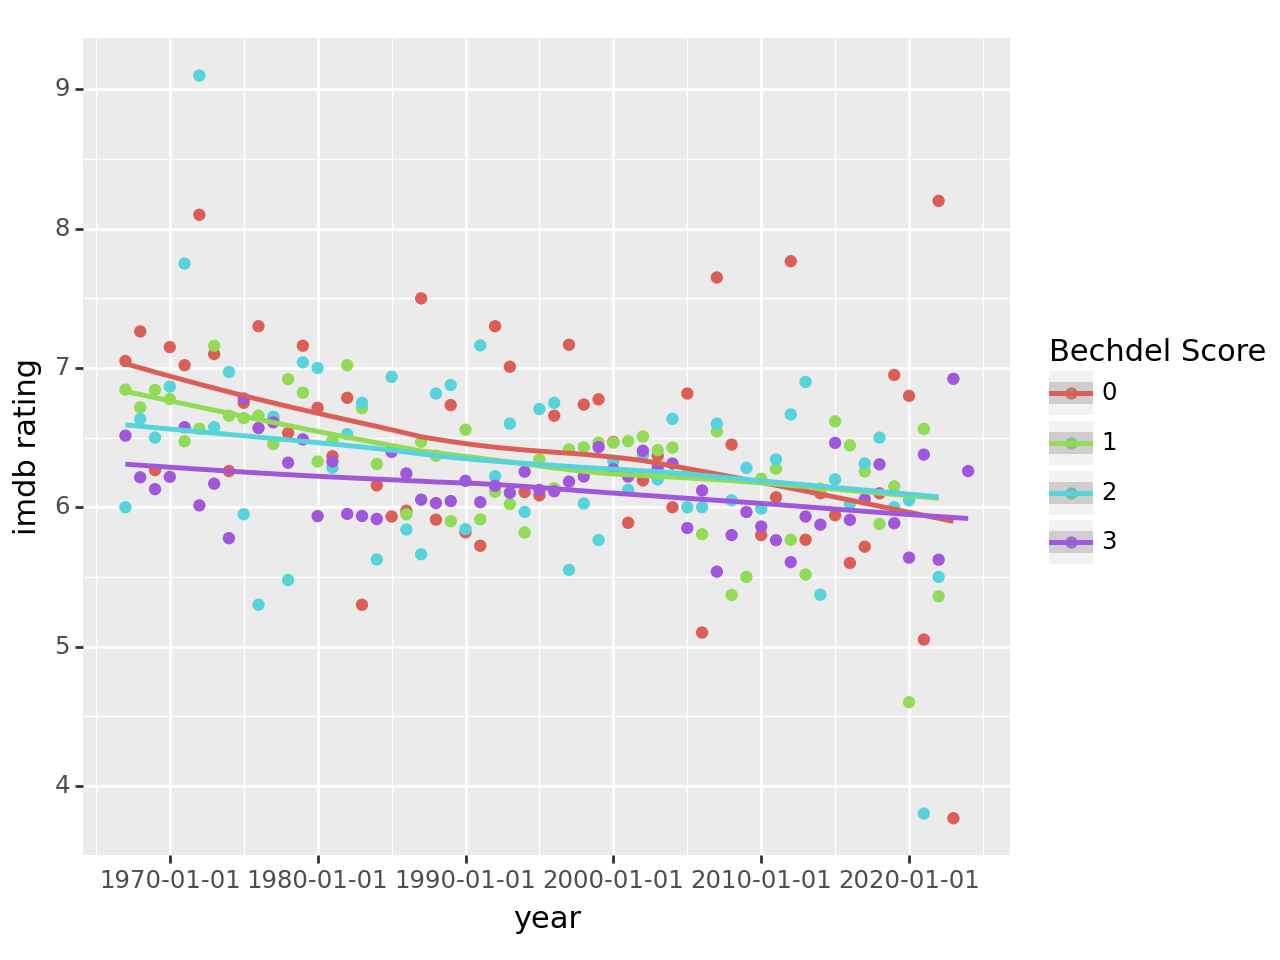

<Figure Size: (640 x 480)>

In [46]:
# Plot Bechdel Score against imdb rating:
ggplot(new,aes(x='year',y='rating',color='Bechdel Score'))+ geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score' )


In [48]:
!pip install gender-guesser


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 5.4 MB/s eta 0:00:00


In [49]:
import gender_guesser.detector as gen
latest = pd.read_csv('movielatest.csv',encoding = "latin")
dfLatest = latest[['name','director']]
dfLatest.head()

,name,director
0,Stand by Me,Rob Reiner
1,Ferris Bueller's Day Off,John Hughes
2,Top Gun,Tony Scott
3,Aliens,James Cameron
4,Flight of the Navigator,Randal Kleiser


In [66]:
dfLatest.rename(columns={'name':'title'}, inplace=True)
dfLatest = pd.merge(dfNew, dfLatest, how='left', left_on=['title'], right_on=['title'])
dfLatest = dfLatest.dropna()
dfLatest.head()

,Bechdel Score,year,imdbid,title,pass_test,rating,director,gender,Male,budget,gross
7,2,1967-01-01,0061452,Casino Royale,0,5.3,Martin Campbell,male,1.0,150000000.0,167445960.0
11,3,1967-01-01,0061391,Bedazzled,1,6.8,Harold Ramis,male,1.0,48000000.0,37879996.0
12,3,1967-01-01,0061391,Bedazzled,1,5.9,Harold Ramis,male,1.0,48000000.0,37879996.0
29,1,1968-01-01,0063442,Planet of the Apes,0,7.9,Tim Burton,male,1.0,100000000.0,180011740.0
30,1,1968-01-01,0063442,Planet of the Apes,0,5.6,Tim Burton,male,1.0,100000000.0,180011740.0


In [67]:
# Predicting gender of director from first name:
d = gen.Detector()
genders = []
firstNames = dfLatest['director'].str.split().str.get(0)
for i in firstNames[0:len(firstNames)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')
dfLatest['gender'] = genders
dfLatest = dfLatest[dfLatest['gender'] != 'unknown']

# Encode the variable gender into a new dataframe:
dfLatest['Male'] = dfLatest['gender'].map( {'male':1, 'female':0} )
dfLatest.head()

,Bechdel Score,year,imdbid,title,pass_test,rating,director,gender,Male,budget,gross
7,2,1967-01-01,0061452,Casino Royale,0,5.3,Martin Campbell,male,1,150000000.0,167445960.0
11,3,1967-01-01,0061391,Bedazzled,1,6.8,Harold Ramis,male,1,48000000.0,37879996.0
12,3,1967-01-01,0061391,Bedazzled,1,5.9,Harold Ramis,male,1,48000000.0,37879996.0
29,1,1968-01-01,0063442,Planet of the Apes,0,7.9,Tim Burton,male,1,100000000.0,180011740.0
30,1,1968-01-01,0063442,Planet of the Apes,0,5.6,Tim Burton,male,1,100000000.0,180011740.0


<Axes: xlabel='gender', ylabel='count'>

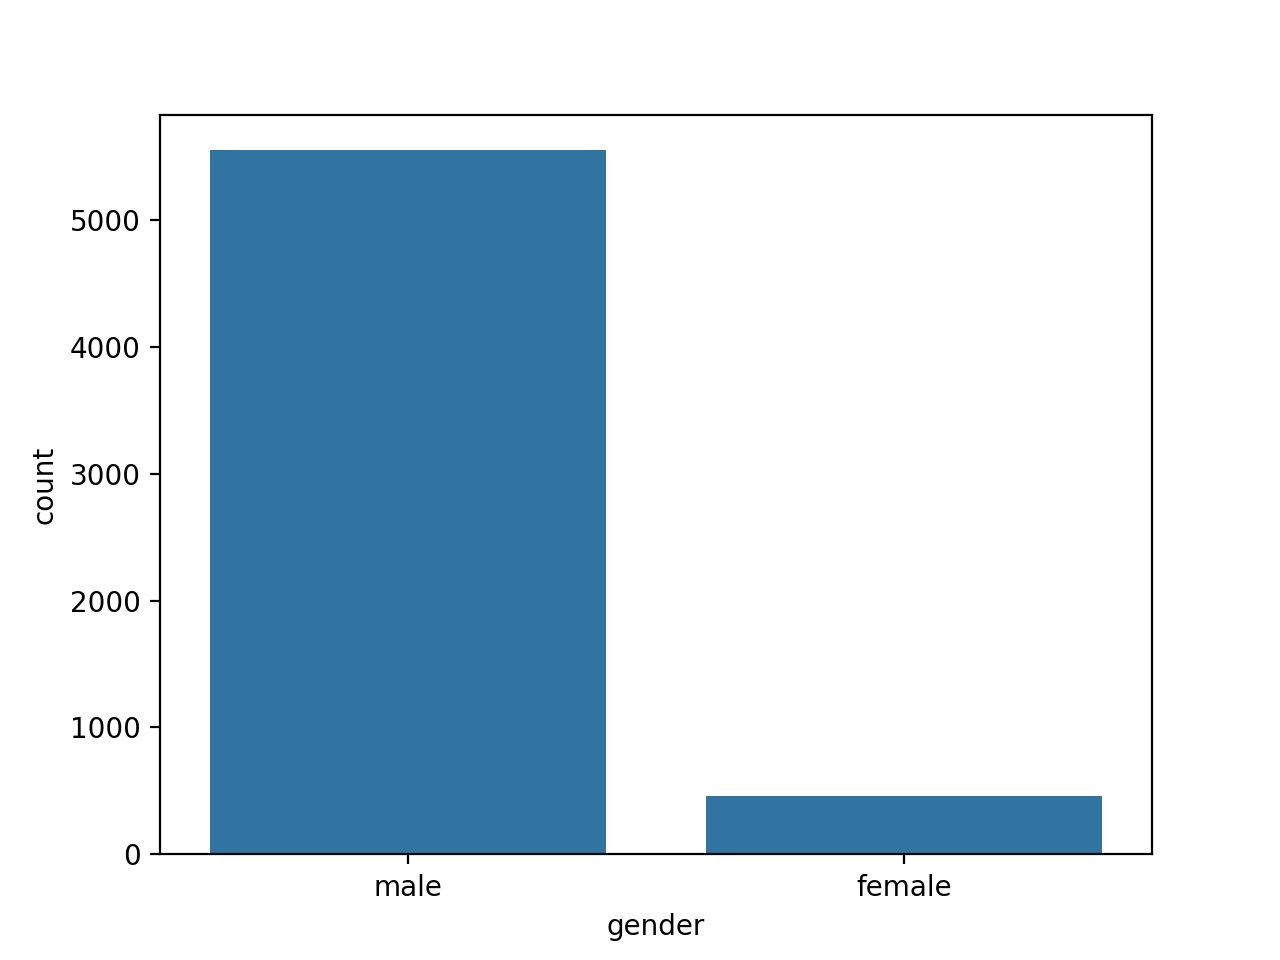

In [51]:
# Visualize gender:
sns.countplot(x='gender',data=dfLatest)

<Axes: xlabel='gender', ylabel='count'>

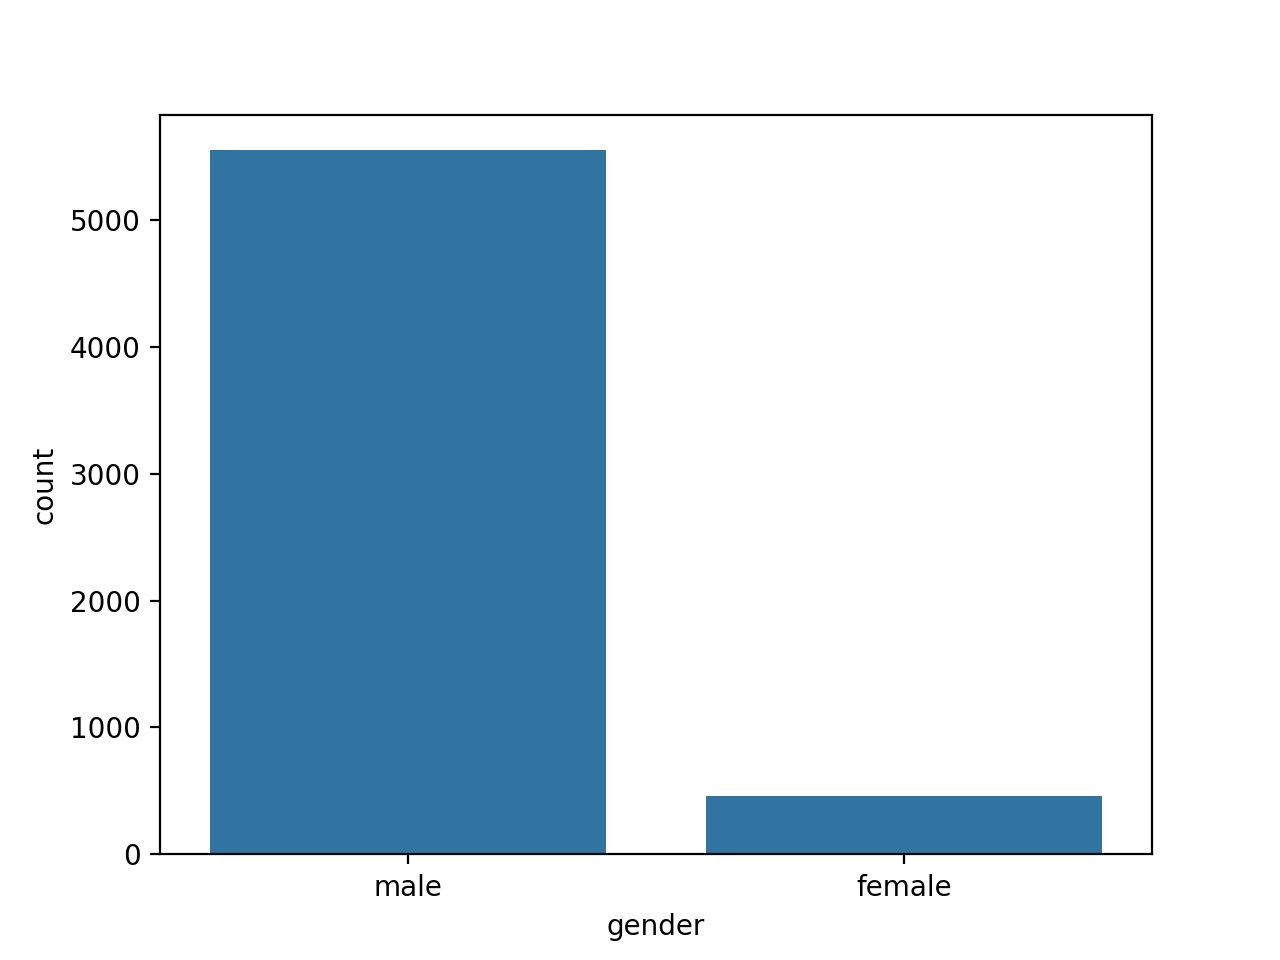

In [58]:
# Visualize gender:
sns.countplot(x='gender',data=dfLatest)

<Axes: xlabel='Bechdel Score', ylabel='count'>

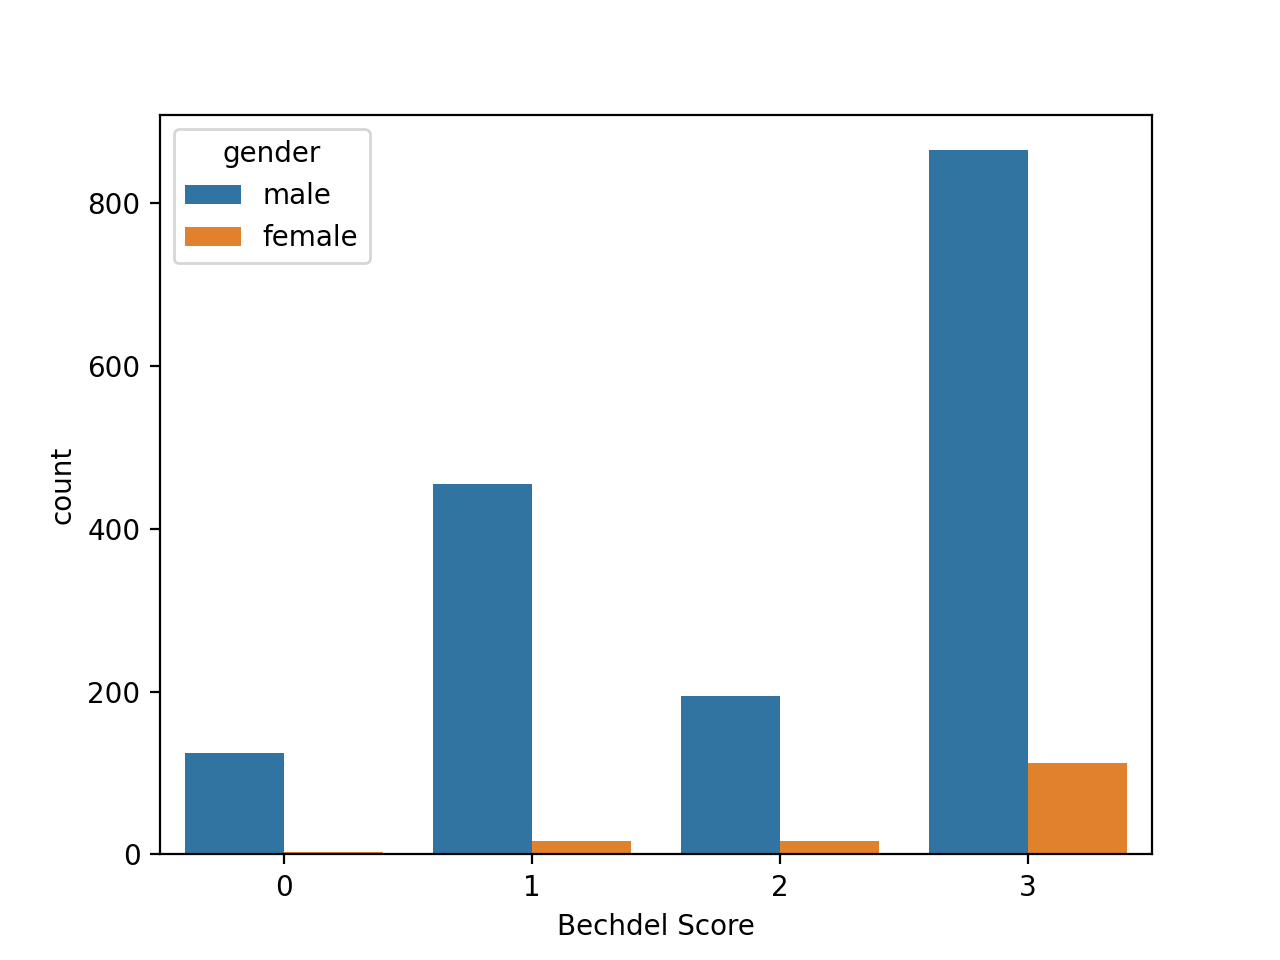

In [68]:
sns.countplot(x='Bechdel Score',hue='gender',data=dfLatest)


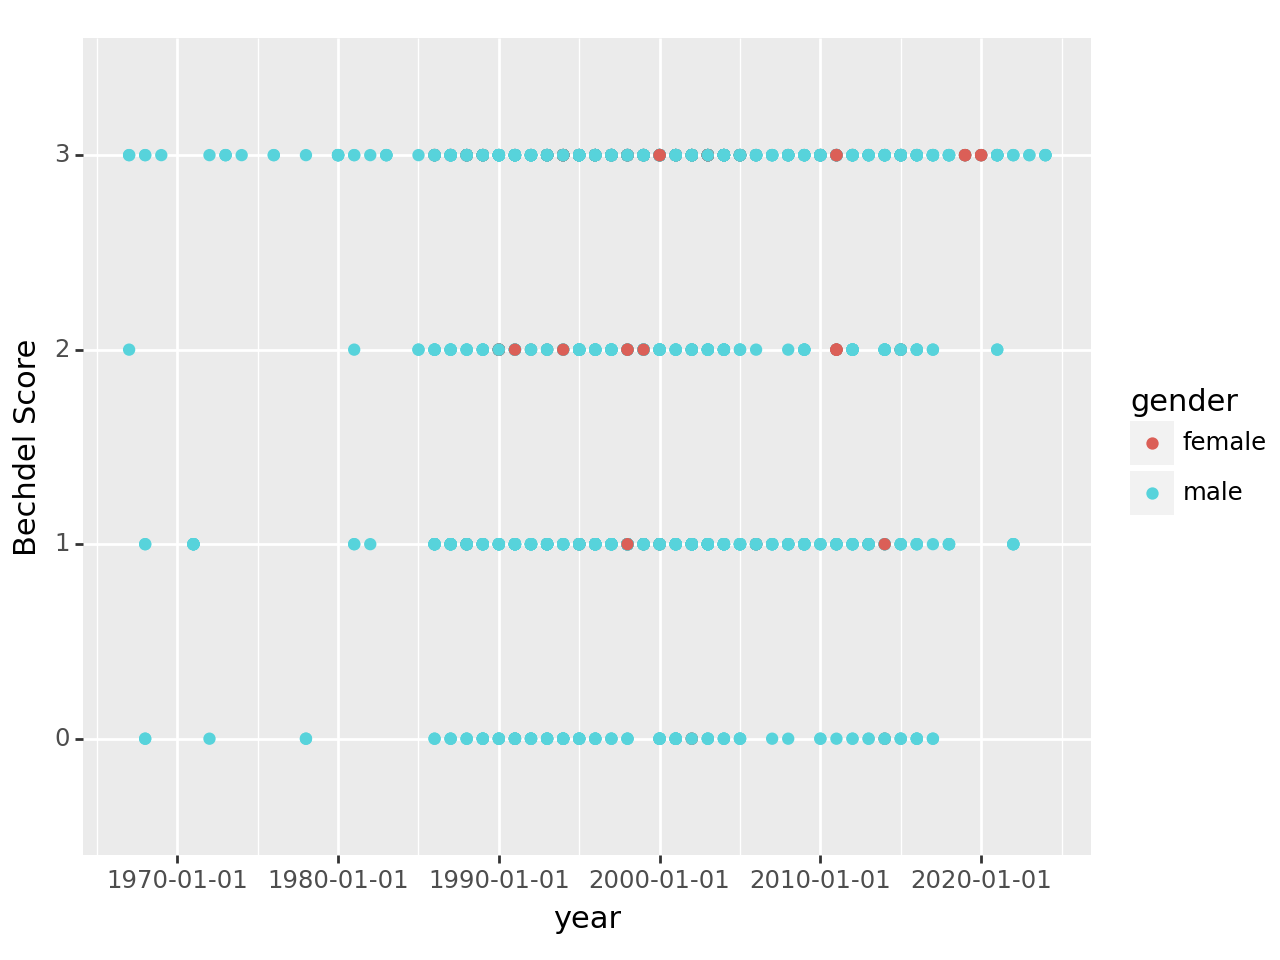

In [71]:
from plotnine import ggplot, aes, geom_point

# Create the plot
plot = (ggplot(dfLatest, aes(x='year', y='Bechdel Score', color='gender'))
        + geom_point())

# Display the plot
print(plot)


In [61]:
dfLatest['budget']=latest['budget']


In [62]:
ggplot(aes(x = 'year', y = 'budget',color='Bechdel Score'), data = dfLatest)+geom_point()+geom_smooth()


TypeError: ggplot.__init__() got multiple values for argument 'data'

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


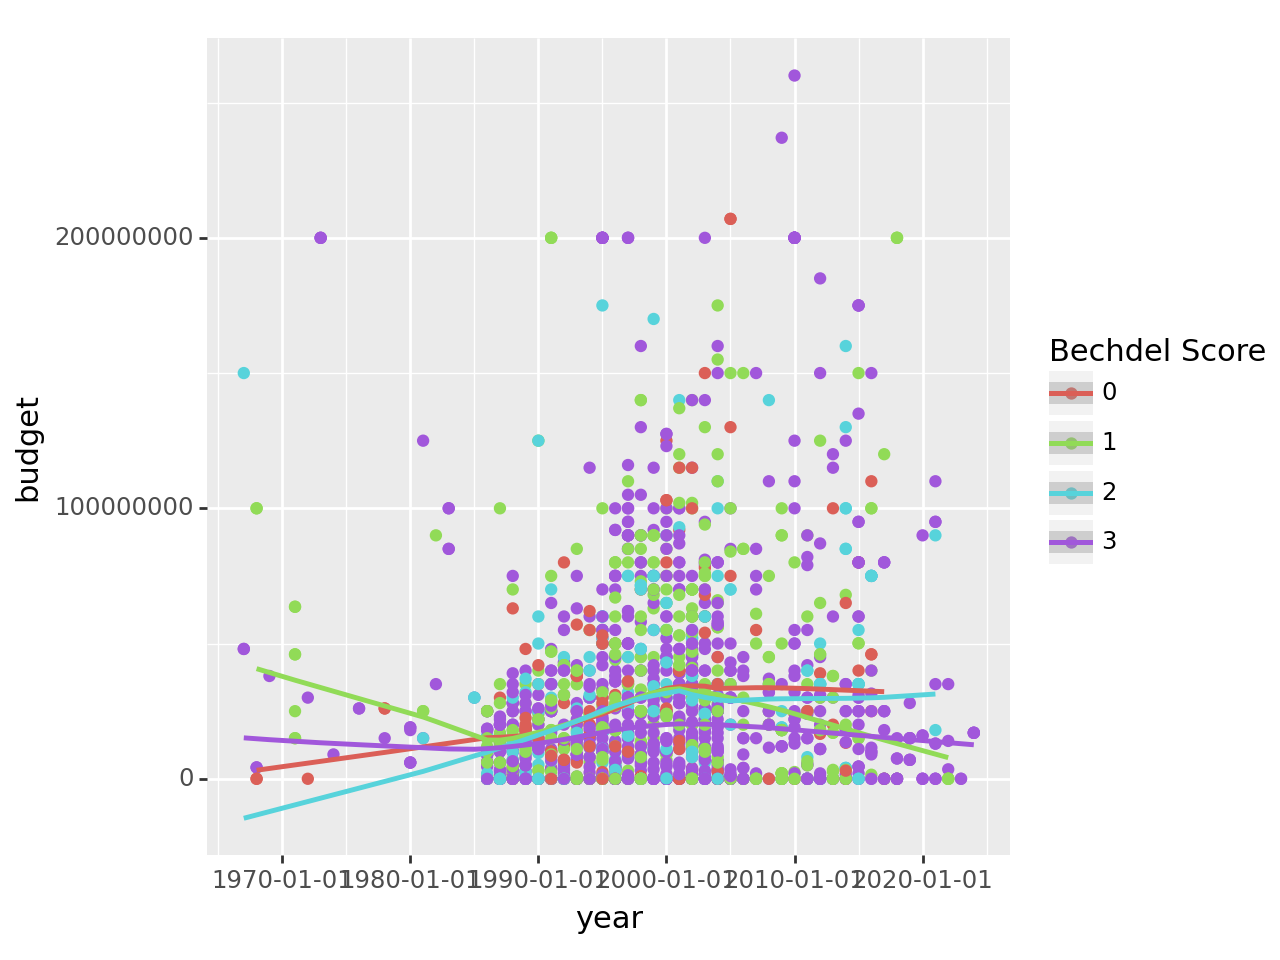

In [72]:
# Create the plot
plot = (ggplot(dfLatest, aes(x='year', y='budget', color='Bechdel Score'))
        + geom_point()
        + geom_smooth())

# Display the plot
print(plot)

In [63]:
dfLatest['genre'] = latest['genre']
ggplot(aes(x = 'year', y = 'genre',color='Bechdel Score'), data = dfLatest)+geom_point()


<Axes: xlabel='Bechdel Score', ylabel='gross'>

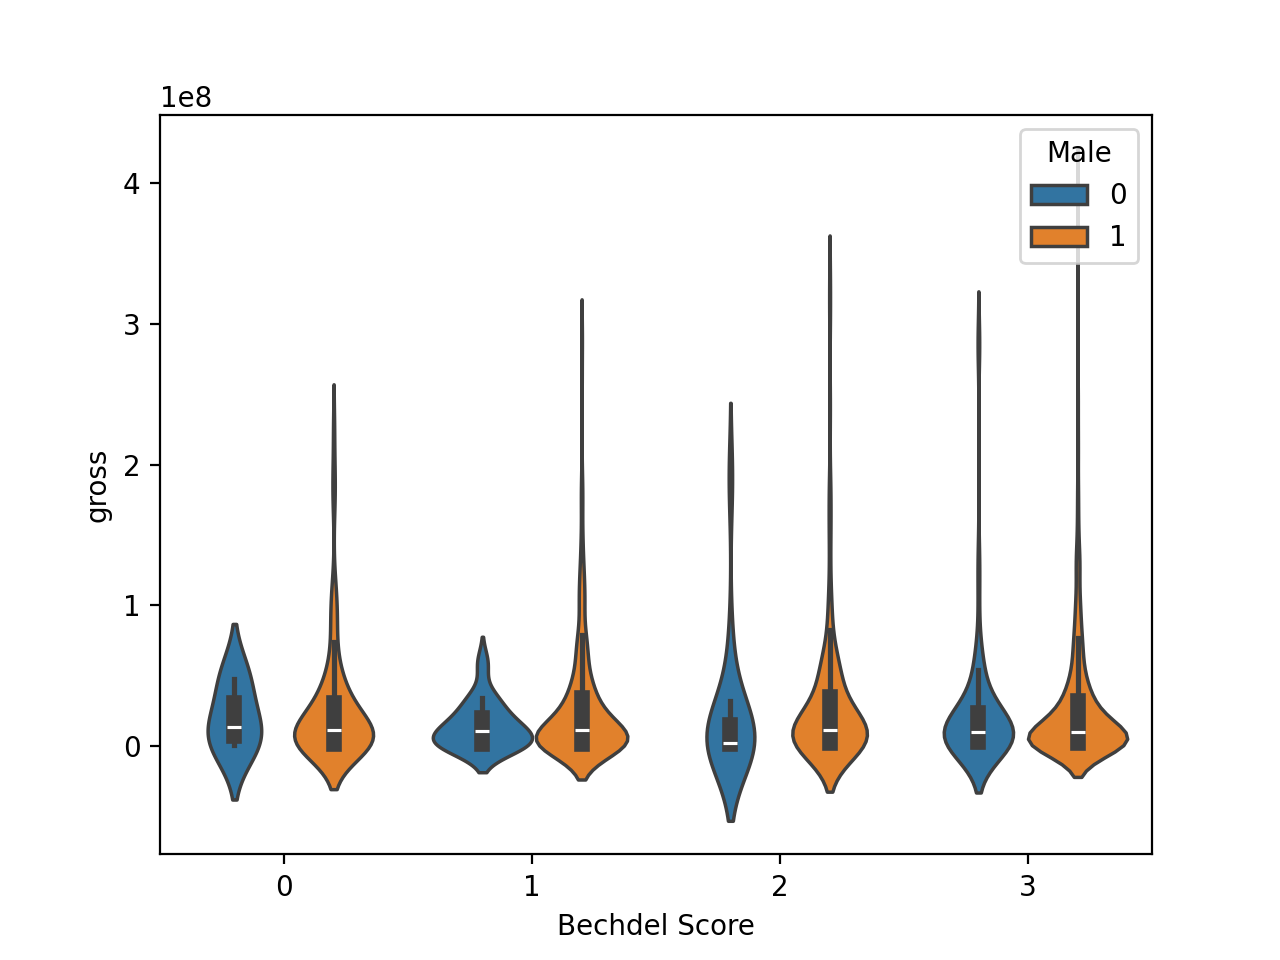

In [73]:
dfLatest['gross'] = latest['gross']
sns.violinplot(x='Bechdel Score',y='gross',hue='Male',data=dfLatest)


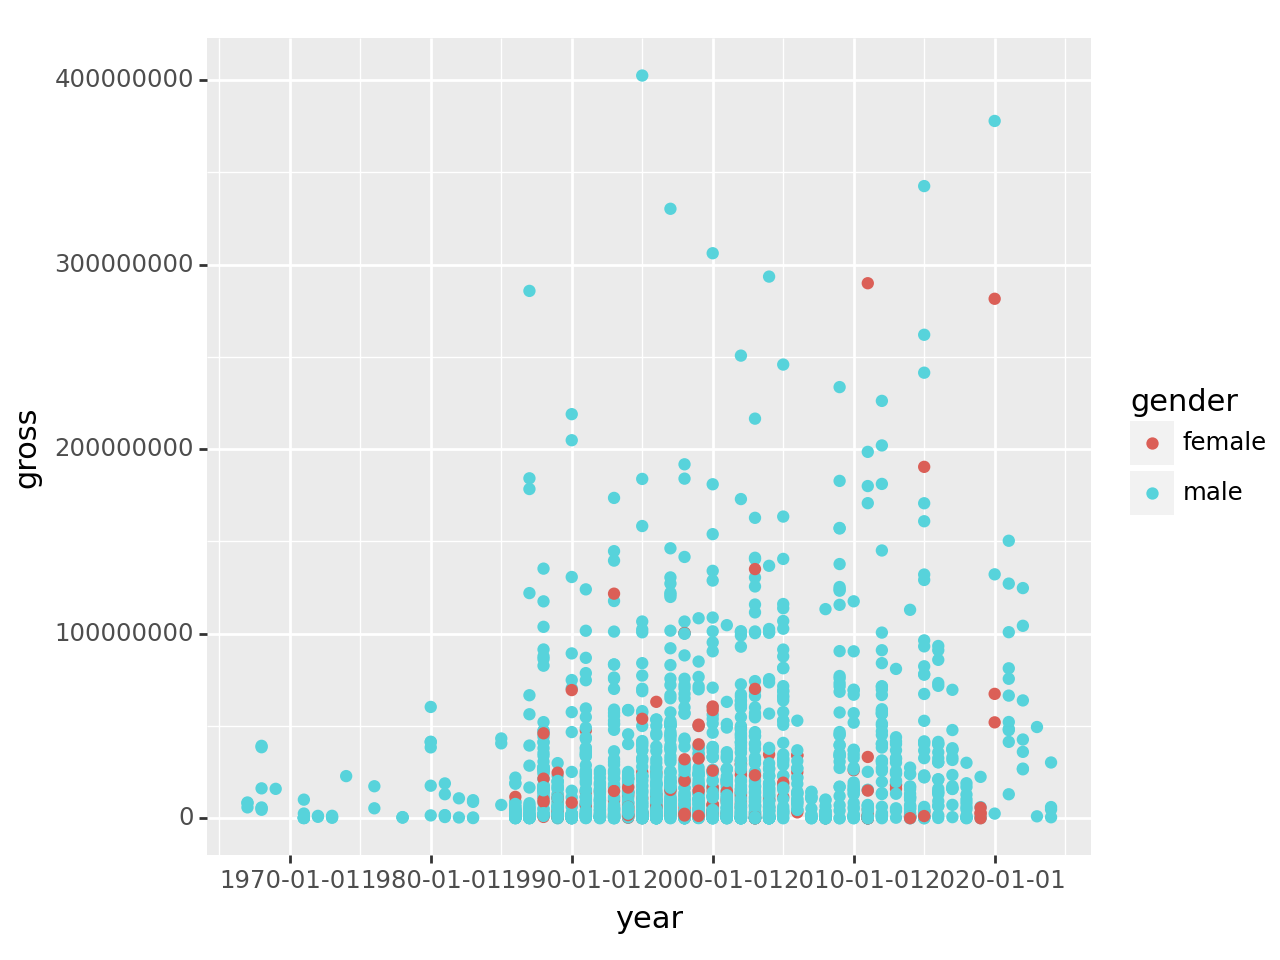

In [75]:
plot = (ggplot(dfLatest, aes(x='year', y='gross', color='gender'))
        + geom_point())

# Display the plot
print(plot)
